In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter
from scipy.signal import lfilter
%matplotlib inline
import pandas as pd
import csv

In [2]:
def butter_lowpass(cutoff, fs, order=9):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=9):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [66]:
t_data = pd.read_csv('data_0530/raw_set/4_raw_2.csv')

In [87]:
print(t_data['EEG'])
fp1 = t_data['EEG']
half = fp1[0::2]
print(half)

0      -0.000004
1      -0.000008
2      -0.000010
3      -0.000010
4      -0.000015
          ...   
7601    0.000172
7602    0.000168
7603    0.000161
7604    0.000156
7605    0.000175
Name: EEG, Length: 7606, dtype: float64
0      -0.000004
2      -0.000010
4      -0.000015
6      -0.000013
8      -0.000006
          ...   
7596    0.000146
7598    0.000143
7600    0.000187
7602    0.000168
7604    0.000156
Name: EEG, Length: 3803, dtype: float64


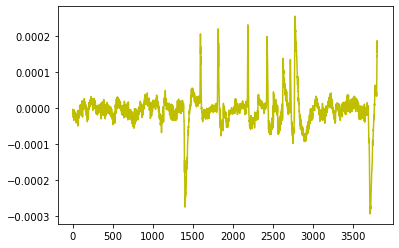

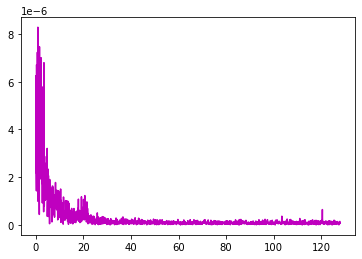

In [96]:
x = range(0,len(half))
N = len(half)
Fs = 256
k = np.arange(N)

T = N/Fs
freq = k / T
freq = freq[range(int(N/2))]
yfft = np.fft.fft(half)

yf = yfft / N
yf = yf[range(int(N/2))]

plt.plot(x, half, 'y', label='origin')
plt.show()

plt.plot(freq,abs(yf),'m')
plt.show()

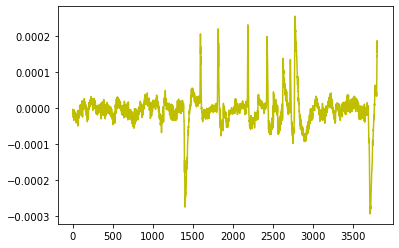

In [97]:
plt.plot(x, half, 'y', label='origin')
# plt.xlim(0,1000)
plt.show()

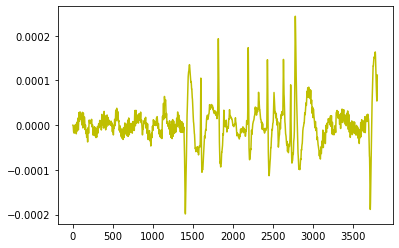

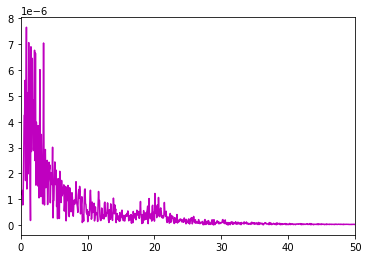

In [98]:
lowcut = 0.5 #500.0
highcut = 30 #1250.0

# lpf = butter_lowpass_filter(half, cutoff, Fs, order=9)
m_lpf = butter_bandpass_filter(half,lowcut, highcut, Fs, order=5)

yfft = np.fft.fft(m_lpf)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.plot(x, m_lpf, 'y', label='origin')
plt.show()

plt.plot(freq,abs(yf),'m')
plt.xlim(0,50)
plt.show()

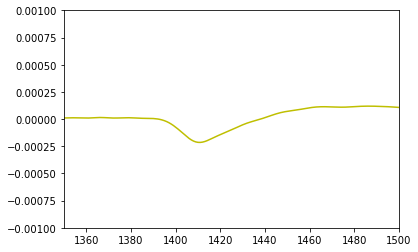

In [93]:
plt.plot(x, m_lpf, 'y', label='origin')
plt.xlim(1350,1500)
plt.ylim(-0.001, 0.001)
plt.show()

In [53]:
print(m_lpf)
k = []
to_csv = []
for data in m_lpf:
    k = []
    k.append(data)
    to_csv.append(k)

[6.37482755e-09 6.28297059e-08 3.05419870e-07 ... 2.23051594e-05
 2.35929782e-05 2.50599953e-05]


In [54]:
print(len(to_csv))

1388


In [55]:
with open('filtered_0601_5.csv', 'w',newline='') as f: 
    fields = ['EEG']
    rows = m_lpf
    write = csv.writer(f)       
    write.writerows(to_csv)